In [3]:
import qiskit as Q

Q.IBMQ.enable_account('7878608ddefeee59708be671ed00d631b124cf308d6d4e9d3e480616c141c711a0cd4674fc780af5e556e17a4cfe44132a07ba768f538d1116b44772e392795b')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

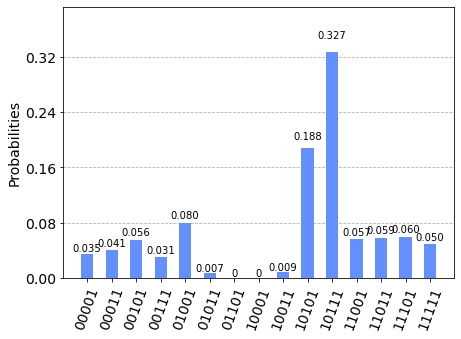

In [4]:
import qiskit as Q
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

qr = Q.QuantumRegister(6)
cr = Q.ClassicalRegister(5)
qc = Q.QuantumCircuit(qr,cr)
qc.h([0])
for i in range(15):
    qc.h([0])
    qc.cx([0],[1])
    qc.x([1])
    qc.ccx([0],[1],[2])
    qc.x([2])
    qc.mcx([0,1,2],[3])
    qc.x([3])
    qc.mcx([0,1,2,3],[4])
    qc.x([4])
    qc.mcx([0,1,2,3,4],[5])
    qc.x([0])
    qc.mcx([0,1,2,3,4],[5])
    qc.x([4])
    qc.mcx([0,1,2,3],[4])
    qc.x([3])
    qc.mcx([0,1,2],[3])
    qc.x([2])
    qc.ccx([0],[1],[2])
    qc.x([1])
    qc.cx([0],[1])


#qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[0])
qc.measure(qr[2],cr[1])
qc.measure(qr[3],cr[2])
qc.measure(qr[4],cr[3])
qc.measure(qr[5],cr[4])

#print(qc)


# plot random generator probability distribution
provider = Q.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = Q.execute(qc , backend = qcomp , shots = 4096)
counts = job.result().get_counts()
#print(counts)
plot_histogram(counts)




In [77]:
def qrandint_H(randomNumRange=32, backendServer = 'qasm_simulator'):
    '''' 
    This code generate a true quantum random number by implementing 
    qiskit Hadarmard gate on a qubit everytime, and store that result
    into a sqeuencial binary bit then translate it into demical number.
    
    Be aware that the way I truncate the "number greater than demanded"
    actually makes the total probability of appearance less or equal to 1,
    but the probablity of appearance of each number is still the same against
    each other, i.e. truly random among [0,randomNumRange)
    '''
    randomNumRange -= 1
    rand = randomNumRange+1

    QRGqc = QuantumCircuit(1, 1)
    QRGqc.h(0)
    QRGqc.measure(0,0)

    while rand > randomNumRange:
        
        randbin = []
        rand = 0
        if randomNumRange >0:
            pass
        else:
            randomNumRange = 1

        for i in range(int(np.ceil(np.log2(randomNumRange)))):
            backend = BasicAer.get_backend(backendServer)
            counts = execute(QRGqc, backend, shots=1).result().get_counts()
            randbin += [int(list(counts.keys())[0])]

        for i,v in enumerate(randbin):
            rand += v*2**i
    return rand

In [5]:
def qrandint():
    provider = Q.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    qcomp = provider.get_backend('ibmq_qasm_simulator')
    job = Q.execute(qc , backend = qcomp , shots = 1)
   
    result = job.result().get_counts()
    print(result)
    
    key, = result
    
    return int(key, 2)
    

In [81]:
import random 

total = 0

bucket_len = 32
N = 1 # number of simultaion
M = 10*bucket_len # number of bonding attempts in each simultaion


x = []
y = []

for i in range(N):
    
    buckets = []
    for i in range(bucket_len):
        buckets.append(0)


    for i in range(M): # could collide infinitely 
#         idx = random.randint(0, bucket_len-1)
        print('time cost: {}'.format(time.time() - t0))
#         idx = qrandint()
        idx = qrandint_H()
        print('time cost: {}'.format(time.time() - t0))
        if(idx != bucket_len-1 and buckets[idx] != 1 and buckets[idx+1] != 1):
            buckets[idx] = 1
            buckets[idx+1] = 1
        
        if i % 10 == 9:
            r = sum(buckets) / bucket_len
            print(r)
            
            x.append(i)
            y.append(r)
            
 
     

    print(buckets)

    ans = sum(buckets) / bucket_len
    print(ans)


    total = total + ans

expectation  = total / N
print(expectation)

time cost: 2438.2783076763153
time cost: 2438.3172006607056
time cost: 2438.3172006607056
time cost: 2438.3461213111877
time cost: 2438.3461213111877
time cost: 2438.3740458488464
time cost: 2438.3740458488464
time cost: 2438.3994340896606
time cost: 2438.3994340896606
time cost: 2438.4173860549927
time cost: 2438.4173860549927
time cost: 2438.4343695640564
time cost: 2438.4343695640564
time cost: 2438.4512951374054
time cost: 2438.452321767807
time cost: 2438.4682507514954
time cost: 2438.4692499637604
time cost: 2438.4862308502197
time cost: 2438.4862308502197
time cost: 2438.5041568279266
0.4375
time cost: 2438.5041568279266
time cost: 2438.525135278702
time cost: 2438.525135278702
time cost: 2438.544137239456
time cost: 2438.544137239456
time cost: 2438.5620357990265
time cost: 2438.5620357990265
time cost: 2438.577991962433
time cost: 2438.577991962433
time cost: 2438.5949454307556
time cost: 2438.5949454307556
time cost: 2438.6169176101685
time cost: 2438.6169176101685
time cost:

time cost: 2441.0904247760773
time cost: 2441.0904247760773
time cost: 2441.1093730926514
0.8125
time cost: 2441.1093730926514
time cost: 2441.130316734314
time cost: 2441.130316734314
time cost: 2441.1472702026367
time cost: 2441.1472702026367
time cost: 2441.163236618042
time cost: 2441.163236618042
time cost: 2441.1781952381134
time cost: 2441.1781952381134
time cost: 2441.1951858997345
time cost: 2441.1951858997345
time cost: 2441.210109472275
time cost: 2441.210109472275
time cost: 2441.2270629405975
time cost: 2441.2270629405975
time cost: 2441.2430214881897
time cost: 2441.2430214881897
time cost: 2441.2610104084015
time cost: 2441.2610104084015
time cost: 2441.276933193207
0.8125
time cost: 2441.276933193207
time cost: 2441.297904729843
time cost: 2441.297904729843
time cost: 2441.3183872699738
time cost: 2441.3193871974945
time cost: 2441.3373658657074
time cost: 2441.3373658657074
time cost: 2441.3533296585083
time cost: 2441.3533296585083
time cost: 2441.3717696666718
time c

time cost: 2443.5066237449646
time cost: 2443.5076489448547
time cost: 2443.524637937546
time cost: 2443.524637937546
time cost: 2443.5405716896057
time cost: 2443.5405716896057
time cost: 2443.5555279254913
time cost: 2443.5555279254913
time cost: 2443.572478055954
time cost: 2443.572478055954
time cost: 2443.587406396866
time cost: 2443.587406396866
time cost: 2443.6023664474487
time cost: 2443.6034235954285
time cost: 2443.6173264980316
0.8125
time cost: 2443.6173264980316
time cost: 2443.6363396644592
time cost: 2443.6363396644592
time cost: 2443.651272058487
time cost: 2443.651272058487
time cost: 2443.6651985645294
time cost: 2443.6651985645294
time cost: 2443.681675672531
time cost: 2443.681675672531
time cost: 2443.6966366767883
time cost: 2443.6976330280304
time cost: 2443.717580795288
time cost: 2443.717580795288
time cost: 2443.7345345020294
time cost: 2443.7345345020294
time cost: 2443.751003742218
time cost: 2443.751003742218
time cost: 2443.767983675003
time cost: 2443.76

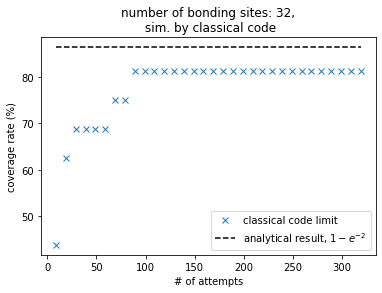

In [83]:
import numpy as np
npx = np.asarray(x)
npy = np.asarray(y)

fig,ax = plt.subplots()

ax.plot(npx, npy*100, ls='none', marker='x', label = 'classical code limit')
ax.plot(npx, [100-100*np.e**-2]*len(npx), ls='--', label = 'analytical result, $1-e^{-2}$', color = 'black')
ax.set_title('number of bonding sites: {},\n sim. by classical code'.format(bucket_len))
ax.set_xlabel('# of attempts')
ax.set_ylabel('coverage rate (%)')
ax.legend()